# PROJECT: Abandonment of employees by a company

## invoke the libraries and csv file

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('../../data/Abandonment_employees.csv', sep = ';', index_col= 'id', na_values='#N/D')
df

,age,abandonment,travels,departament,house_distance,educations,career,employees,satisfaction_environment,sex,...,satisfaction_colleagues,fortnight_hours,action_level,experience_age,num_formations_last_year,conciliation,years_company,years_in_job,years_since_last_promotion,years_with_current_manager
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,University,Life Sciences,1,Half,3.0,...,Low,80,0,8,0,NaN,6,NaN,0,5
2,49,No,Travel_Frequently,Research & Development,8,High_school,Life Sciences,1,High,2.0,...,Highher,80,1,10,3,NaN,10,NaN,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,High_school,Other,1,Highher,2.0,...,Half,80,0,7,3,NaN,0,2.0,0,0
5,33,No,Travel_Frequently,Research & Development,3,University,Life Sciences,1,Highher,3.0,...,High,80,0,8,3,NaN,8,3.0,3,0
7,27,No,Travel_Rarely,Research & Development,2,University,Medical,1,Low,3.0,...,Highher,80,1,6,3,NaN,2,NaN,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,1,High,4.0,...,High,80,1,17,3,NaN,5,4.0,0,3
2062,39,No,Travel_Rarely,Research & Development,6,High_school,Medical,1,Highher,2.0,...,Low,80,1,9,5,NaN,7,NaN,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Half,4.0,...,Half,80,1,6,0,NaN,6,NaN,0,3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         1470 non-null   int64  
 1   abandonment                 1470 non-null   object 
 2   travels                     1470 non-null   object 
 3   departament                 1470 non-null   object 
 4   house_distance              1470 non-null   int64  
 5   educations                  1369 non-null   object 
 6   career                      1470 non-null   object 
 7   employees                   1470 non-null   int64  
 8   satisfaction_environment    1470 non-null   object 
 9   sex                         1271 non-null   float64
 10  implication                 1452 non-null   object 
 11  job_level                   1470 non-null   int64  
 12  job                         1470 non-null   object 
 13  job_satisfaction            1394 non-n

In [7]:
df.isna().sum().sort_values(ascending = False)

years_in_job                  1238
conciliation                  1011
sex                            199
educations                     101
job_satisfaction                76
implication                     18
age                              0
action_level                     0
evaluation                       0
satisfaction_colleagues          0
fortnight_hours                  0
experience_age                   0
extra_time                       0
num_formations_last_year         0
years_company                    0
years_since_last_promotion       0
salary_increase_perc             0
salary_month                     0
older                            0
num_previous_companies           0
abandonment                      0
civil_status                     0
job                              0
job_level                        0
satisfaction_environment         0
employees                        0
career                           0
house_distance                   0
departament         

i can conclude:

years_in_job and conciliation have too many nulls --> delete Variables
sex, education, job_satisfaction and implication --> impute them after EDA

In [8]:
df.drop(columns = ['years_in_job','conciliation'], inplace = True)
df

,age,abandonment,travels,departament,house_distance,educations,career,employees,satisfaction_environment,sex,...,salary_increase_perc,evaluation,satisfaction_colleagues,fortnight_hours,action_level,experience_age,num_formations_last_year,years_company,years_since_last_promotion,years_with_current_manager
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,University,Life Sciences,1,Half,3.0,...,11,High,Low,80,0,8,0,6,0,5
2,49,No,Travel_Frequently,Research & Development,8,High_school,Life Sciences,1,High,2.0,...,23,Highher,Highher,80,1,10,3,10,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,High_school,Other,1,Highher,2.0,...,15,High,Half,80,0,7,3,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,University,Life Sciences,1,Highher,3.0,...,11,High,High,80,0,8,3,8,3,0
7,27,No,Travel_Rarely,Research & Development,2,University,Medical,1,Low,3.0,...,12,High,Highher,80,1,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,1,High,4.0,...,17,High,High,80,1,17,3,5,0,3
2062,39,No,Travel_Rarely,Research & Development,6,High_school,Medical,1,Highher,2.0,...,15,High,Low,80,1,9,5,7,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Half,4.0,...,20,Highher,Half,80,1,6,0,6,0,3


EDA CATEGORICAL VARIABLES

In [10]:
def graphics_eda_categoricos(cat):

     #We calculate the number of rows we need
     from math import ceil
     rows = ceil(cat.shape[1] / 2)

     #We define the graph
     f, ax = plt.subplots(nrows = rows, ncols = 2, figsize = (16, rows * 6))

     #Flatten to iterate through the graph as if it were 1 dimension instead of 2
     ax = ax.flat

     #We create the loop that adds graphics
     for each, variable in enumerate(cat):
         cat[variable].value_counts().plot.barh(ax = ax[each])
         ax[each].set_title(variable, fontsize = 12, fontweight = "bold")
         ax[each].tick_params(labelsize = 12)

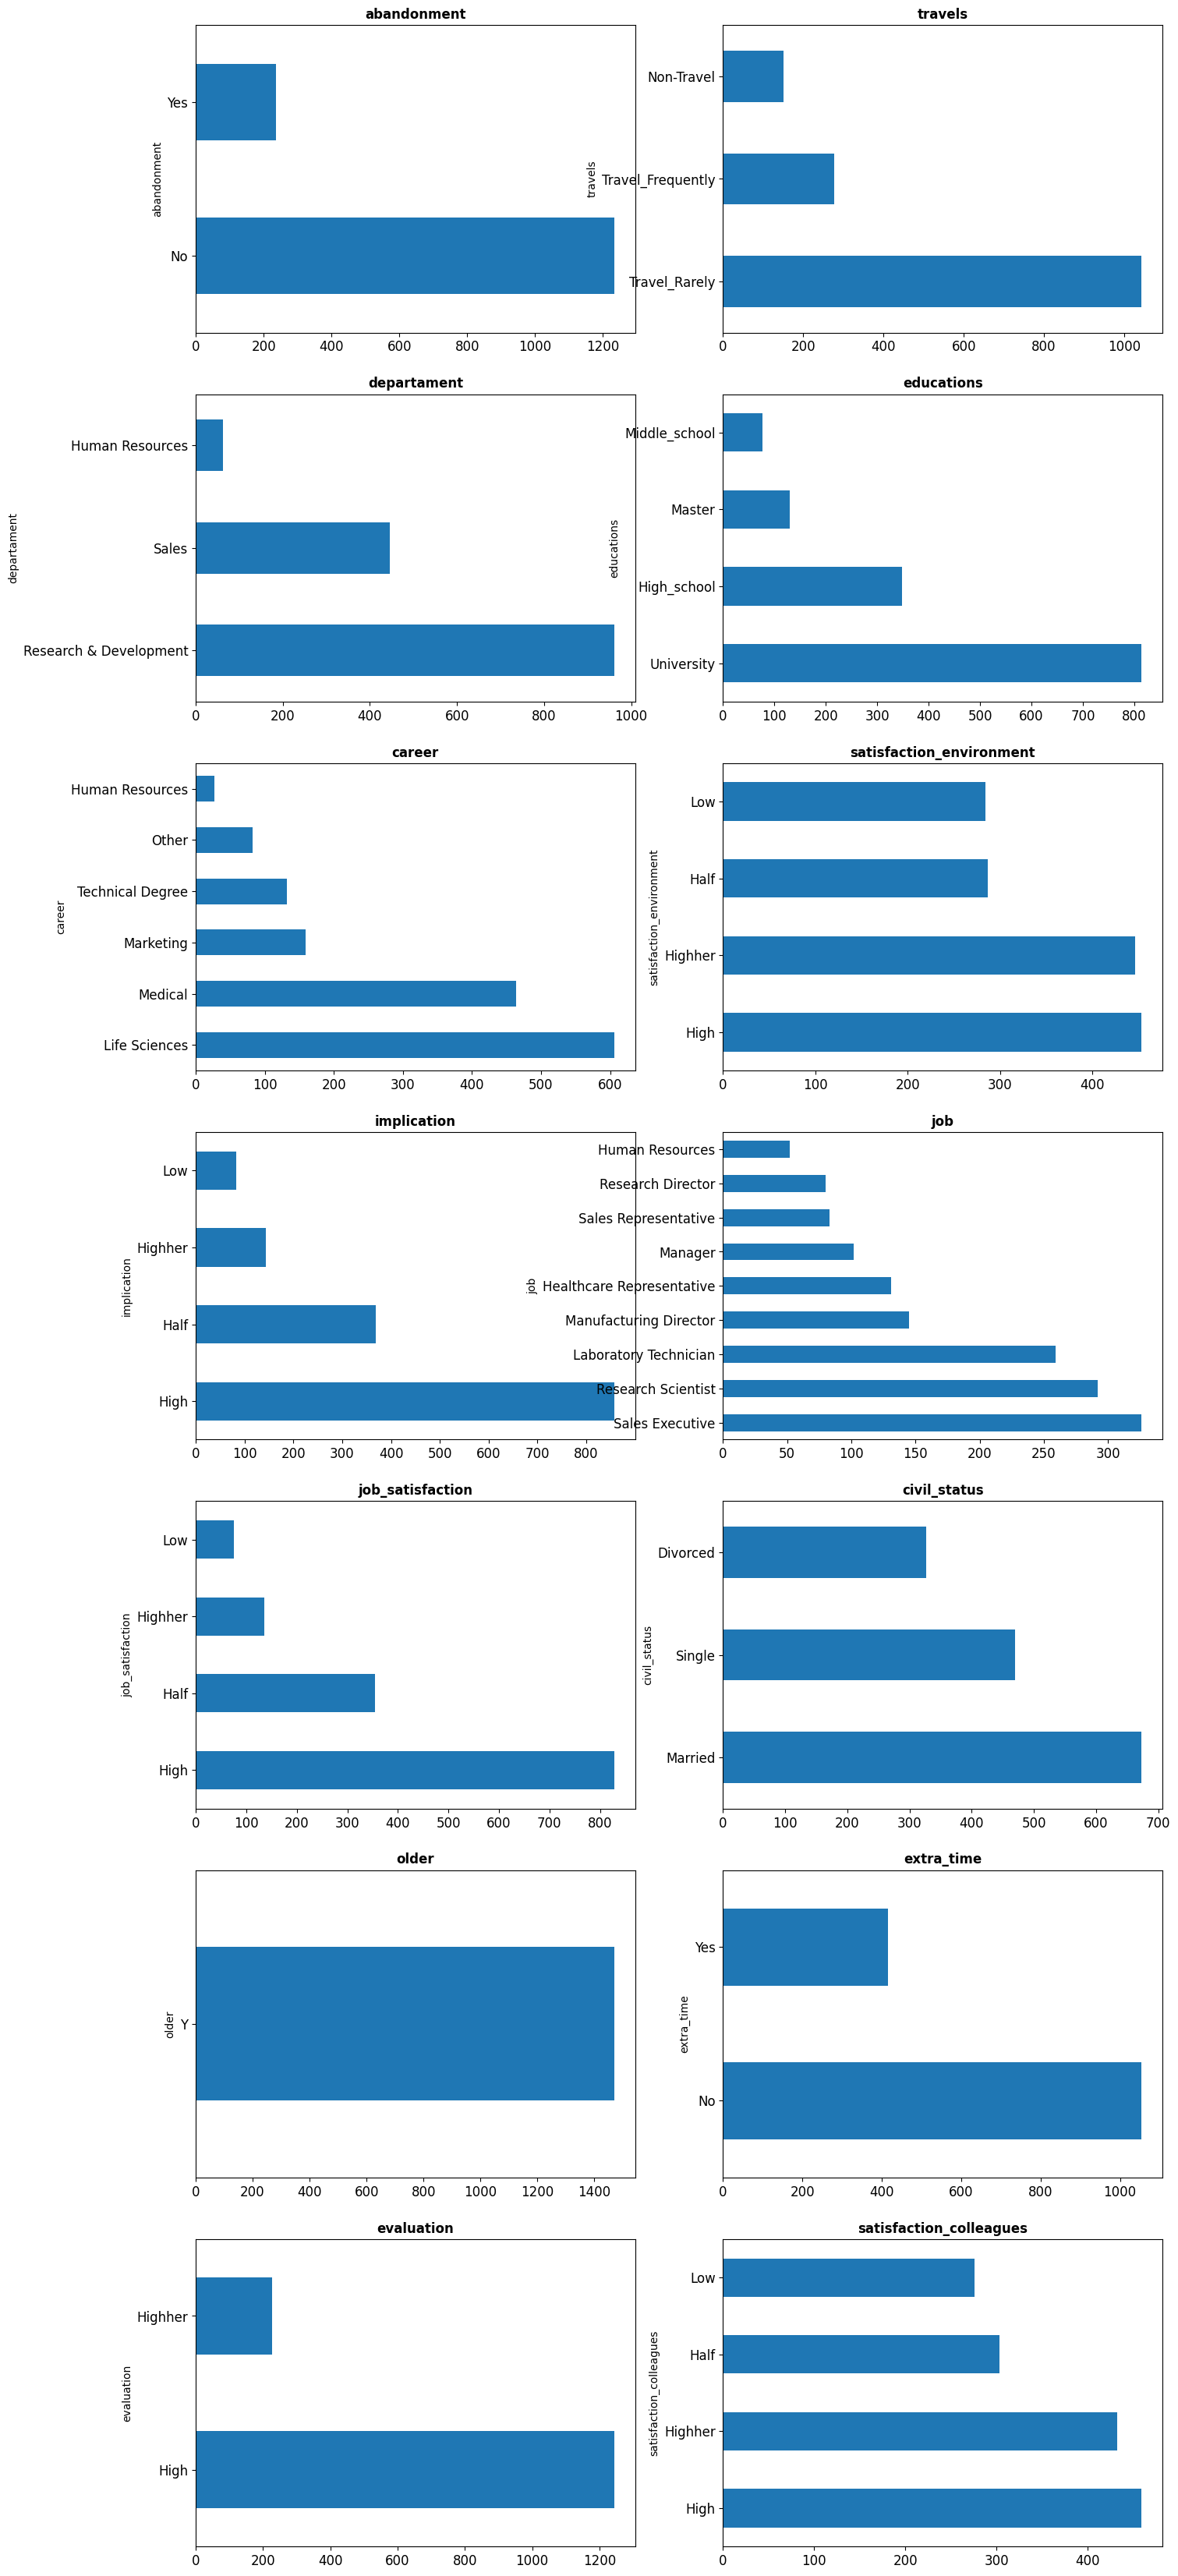

In [11]:
graphics_eda_categoricos(df.select_dtypes('O'))